In [35]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [36]:
#Get the stock update
df = web.DataReader('BBRI.JK', data_source='yahoo', start='2008-01-01', end='2018-12-31')

In [38]:
#shw the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-02,740.0,730.0,735.0,735.0,44765000.0,501.078674
2008-01-03,735.0,710.0,735.0,720.0,102940000.0,490.852539
2008-01-04,755.0,715.0,720.0,750.0,143670000.0,511.304810
2008-01-07,750.0,730.0,735.0,745.0,63700000.0,507.896088
2008-01-08,755.0,745.0,750.0,750.0,84225000.0,511.304810
...,...,...,...,...,...,...
2018-12-26,3630.0,3520.0,3550.0,3600.0,83406800.0,3267.093994
2018-12-27,3670.0,3620.0,3650.0,3660.0,71717800.0,3321.545654
2018-12-28,3680.0,3650.0,3680.0,3660.0,122945700.0,3321.545654


In [39]:
#Get the numbers of rows and columns in the data set
df.shape

(2716, 6)

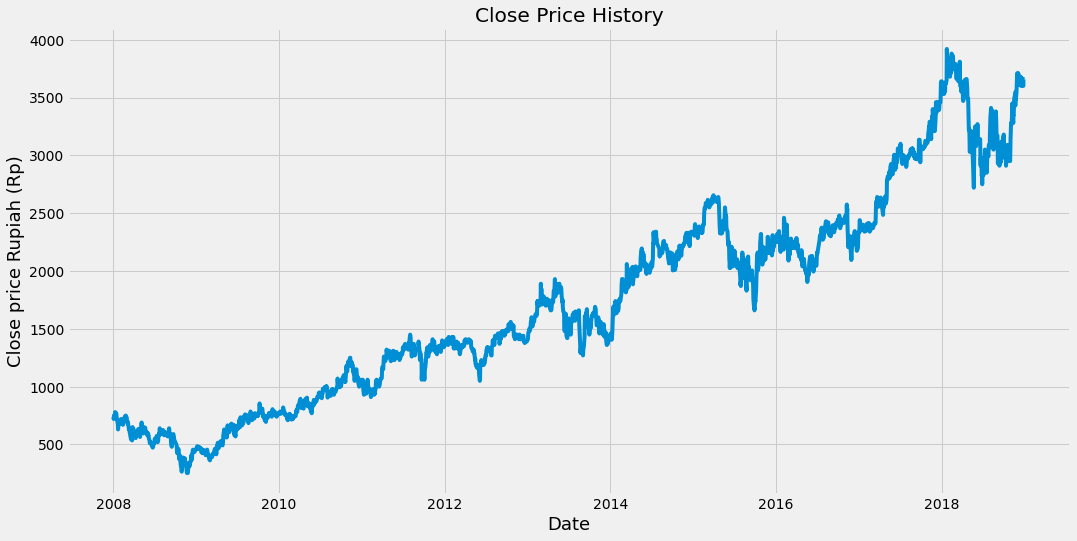

In [41]:
#Visualize the closing price history => Only for observation
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close price Rupiah (Rp)', fontsize = 18)
plt.show()

In [42]:
#Create a new dataframe with only the 'Close' Column
data = df.filter(['Close'])

In [43]:
#convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

In [44]:
training_data_len

2173

In [45]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.13156101],
       [0.12747103],
       [0.13565099],
       ...,
       [0.92910702],
       [0.92910702],
       [0.92910702]])

In [46]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.13156101, 0.12747103, 0.13565099, 0.13428766, 0.13565099,
       0.14383095, 0.14110429, 0.13701431, 0.13019768, 0.12883436,
       0.12474438, 0.11520109, 0.10293115, 0.10838446, 0.11383776,
       0.12201772, 0.11520109, 0.11656442, 0.11792774, 0.12201772,
       0.11929107, 0.12747103, 0.12338105, 0.11792774, 0.11520109,
       0.11520109, 0.11383776, 0.11929107, 0.1261077 , 0.12201772,
       0.13019768, 0.12883436, 0.13292434, 0.13428766, 0.13565099,
       0.13156101, 0.13019768, 0.13292434, 0.12747103, 0.12338105,
       0.11656442, 0.11929107, 0.11792774, 0.10293115, 0.10429448,
       0.10565781, 0.09747785, 0.09475119, 0.08520791, 0.08384458,
       0.0797546 , 0.07702795, 0.09611452, 0.10838446, 0.10429448,
       0.10429448, 0.10293115, 0.09338787, 0.09338787, 0.08520791])]
[0.08929788684389912]



In [47]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [48]:
#Reshare the data
x_train = np.reshape (x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2113, 60, 1)

In [49]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [50]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [52]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs =3)

Epoch 1/3
2113/2113 [==============================] - 45s 21ms/step - loss: 4.0000e-04
Epoch 2/3
2113/2113 [==============================] - 45s 21ms/step - loss: 3.0948e-04
Epoch 3/3
2113/2113 [==============================] - 45s 22ms/step - loss: 2.3402e-04


In [53]:
#Create the testing dataset
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]

#Create the data sets x-test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [54]:
#Convert the data to a numpy array
x_test = np.array (x_test)

In [55]:
#Reshare the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [56]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [57]:
#Get the roor mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) **2)))
rmse

65.55095447869931

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


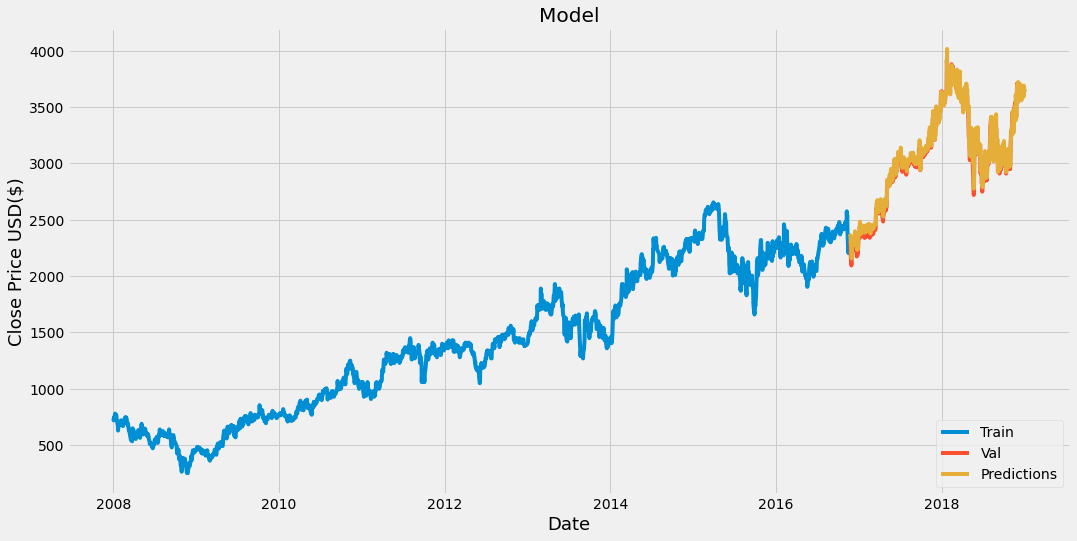

In [58]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [59]:
#Show the Valid and Predicted prices
valid

,Close,Predictions
Date,,
2016-11-22,2295.0,2353.160400
2016-11-23,2300.0,2360.303711
2016-11-24,2260.0,2362.415039
2016-11-25,2185.0,2314.363281
2016-11-28,2095.0,2240.241455
...,...,...
2018-12-26,3600.0,3617.152344
2018-12-27,3660.0,3591.527100
2018-12-28,3660.0,3689.757324


In [60]:
#Get the quote 
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2008-01-01', end='2018-12-31')

#Create a new dataframe
new_df = apple_quote.filter (['Close'])

#Get the last 60day closing price values and convert the dataframe to an array
last_60_days = new_df [-60:].values

#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform (last_60_days)

#Create an empty list 
X_test = []

#append the past 60 days
X_test.append(last_60_days_scaled)

#Convert the x_test data set to a numpy array
X_test = np.array (X_test)

#Reshape the data 
X_test = np.reshape (X_test, (X_test.shape[0], X_test.shape[1],1))

#Get the predicted scaled price
pred_price = model.predict (X_test)

#undo the scalling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[54.631252]]


In [63]:
#Get the quote 
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start = '2019-01-02', end='2019-01-02')
print(apple_quote2['Close'])

Date
2019-01-02    39.48
Name: Close, dtype: float64
